In [ ]:
%pip install numpy
%pip install qiskit
%pip install pylatexenc

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
from math import pi, e
import cmath
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import qiskit
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

In [ ]:
class QuantumCircuitModel():
    def __init__(self):
        self.circuit = qiskit.QuantumCircuit(3, 1)
        # Creating parameters
        self.params = [
            qiskit.circuit.Parameter('theta1'),
            qiskit.circuit.Parameter('theta2'),
            qiskit.circuit.Parameter('theta3'),
            qiskit.circuit.Parameter('theta4'),
            qiskit.circuit.Parameter('phi1'),
            qiskit.circuit.Parameter('phi2'),
            qiskit.circuit.Parameter('phi3'),
            qiskit.circuit.Parameter('phi4'),
        ]
        # First part of the circuit (input handling)
        self.circuit.h([0,1])

        self.circuit.x([0,1])
        self.circuit.cp(self.params[0], [0], 1)
        self.circuit.x([0,1])

        self.circuit.x(0)
        self.circuit.cp(self.params[1], [0], 1)
        self.circuit.x(0)
        self.circuit.x(1)
        self.circuit.cp(self.params[2], [0], 1)
        self.circuit.x(1)
        self.circuit.cp(self.params[3], [0], 1)

        self.circuit.barrier()

        # Second part of the circuit (apply weights)


        self.circuit.x([0,1])
        self.circuit.cp(-self.params[4], [0], 1)
        self.circuit.x([0,1])

        self.circuit.x(0)
        self.circuit.cp(-self.params[5], [0], 1)
        self.circuit.x(0)
        self.circuit.x(1)
        self.circuit.cp(-self.params[6], [0], 1)
        self.circuit.x(1)
        self.circuit.cp(-self.params[7], [0], 1)


        self.circuit.h([0,1])
        self.circuit.x([0,1])

        self.circuit.ccx(0,1,2)
        self.circuit.measure(2, 0)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def load_and_split_iris() -> tuple[pd.core.frame.DataFrame]:
    iris_dataset = load_iris()
    iris_dataset_pandas = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
    iris_dataset_pandas['target'] = iris_dataset.target

    train, test = train_test_split(iris_dataset_pandas, test_size=0.3)

    return (train, test)

def normalize_dataset(
    dataset: pd.core.frame.DataFrame
) -> pd.core.frame.DataFrame:
    min_max_scaler = MinMaxScaler((0, pi/2))
    dataset.iloc[:, [0, 1, 2, 3]] = min_max_scaler.fit_transform(dataset.iloc[:, [0, 1, 2, 3]])
    # Normalize values between 0 and 1
    return dataset

train, test = load_and_split_iris()

train_normalized = normalize_dataset(train)
test_normlized = normalize_dataset(test)

In [ ]:
def split_iris_in_classes(
    dataset: pd.core.frame.DataFrame
) -> tuple[np.ndarray]:
    dataset_np = dataset.to_numpy()
    class_1 = dataset_np[dataset_np[:,4]==0.]
    class_2 = dataset_np[dataset_np[:,4]==1.]
    class_3 = dataset_np[dataset_np[:,4]==2.]

    return class_1, class_2, class_2

class_1, class_2, class_3 = split_iris_in_classes(train)

class_1_weights = []
class_2_weights = []
class_3_weights = []

for w in range(4):
    class_1_weights.append(sum(class_1[:,w])/len(class_1[:,w]))
    class_2_weights.append(sum(class_2[:,w])/len(class_2[:,w]))
    class_3_weights.append(sum(class_3[:,w])/len(class_3[:,w]))

def return_theta_values(
    input_vector: list[float]
    ) -> tuple[float]:
    value_theta1 = input_vector[1] - input_vector[0]
    value_theta2 = input_vector[2] - input_vector[0]
    value_theta3 = input_vector[3] - input_vector[0]
    return (value_theta1,
            value_theta2,
            value_theta3)

class_1_weights, class_2_weights, class_3_weights

([0.30887927770588736,
  0.8486380155151646,
  0.12170818996958038,
  0.09910976823824941],
 [0.7533149050887292,
  0.39468241039417207,
  0.8748832648768186,
  0.7944884199182523],
 [0.7533149050887292,
  0.39468241039417207,
  0.8748832648768186,
  0.7944884199182523])

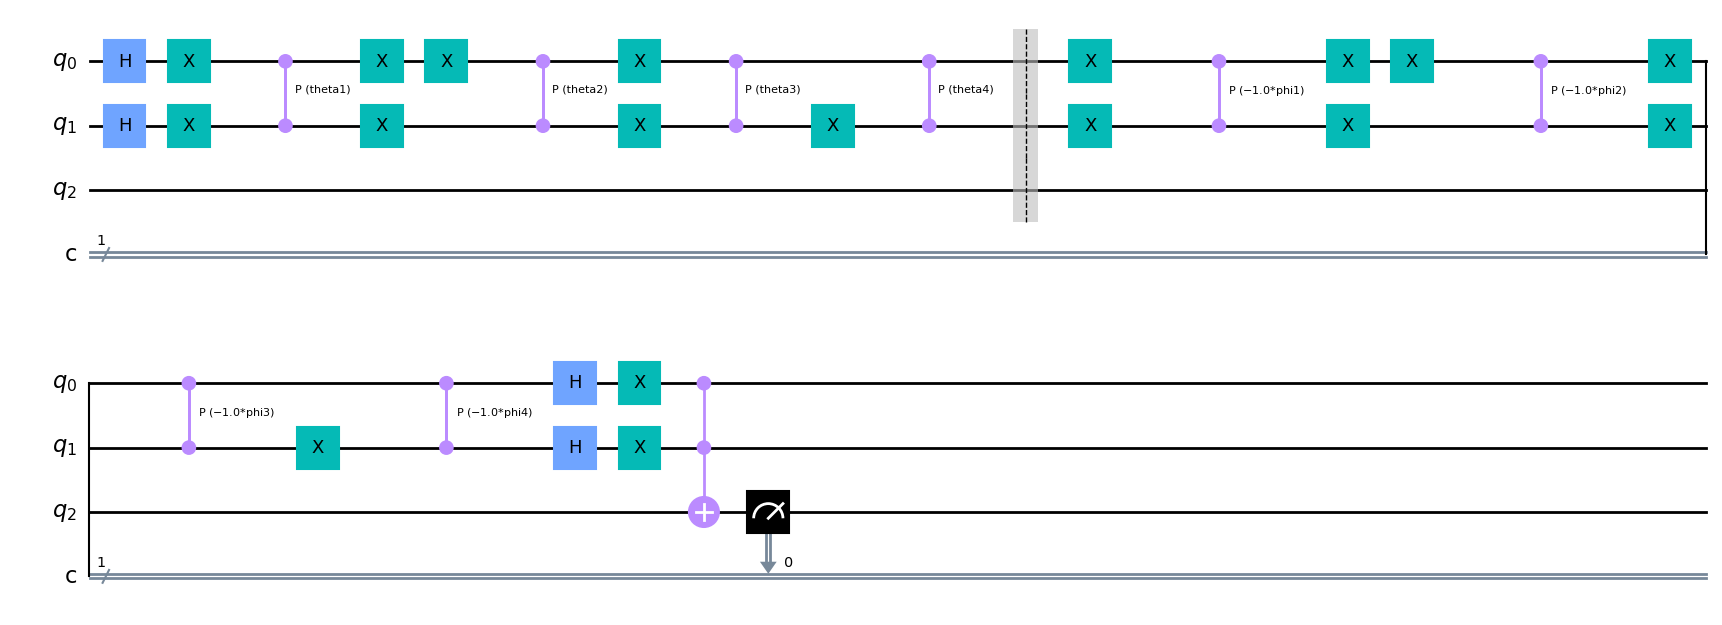

In [ ]:
neuron = QuantumCircuitModel().circuit; display(neuron.draw(output='mpl'))

In [ ]:
def run_neuron(
    input_vector: list[float],
    weight_vector: list[float]
) -> float:
    # Create neuron
    neuron = QuantumCircuitModel()
    backend = qiskit.Aer.get_backend('aer_simulator')

    # Apply input and weight parameters
    bound_neuron = neuron.circuit.bind_parameters({
        neuron.params[0]: input_vector[0],
        neuron.params[1]: input_vector[1],
        neuron.params[2]: input_vector[2],
        neuron.params[3]: weight_vector[0],
        neuron.params[4]: weight_vector[1],
        neuron.params[5]: weight_vector[2],
    })

    neuron_transpiled = qiskit.transpile(bound_neuron, backend)

    result = backend.run(neuron_transpiled, shots=5000).result()
    counts = result.get_counts()

    return counts['1']/5000

def run_neuron_on_dataset(
    input_matrix: np.ndarray,
    weight_vectors: list[list[float]]
) -> list[float]:
    predictions = []
    for input_vector in input_matrix:
        expected_class = int(input_vector[4])
        input_vector = list(input_vector)[0:4]
        theta1, theta2, theta3 = return_theta_values(input_vector)
        results = []
        for weight_vector in weight_vectors:
            results.append(run_neuron(
                [theta1, theta2, theta3],
                weight_vector))
        predictions.append(
            (np.argmax(results), expected_class)
        )

    return predictions

In [ ]:
all_weights = [class_1_weights, class_2_weights, class_3_weights]
predictions = run_neuron_on_dataset(test.to_numpy(), all_weights)

AerError: ignored

In [ ]:
def get_accuracy(predictions: list[tuple]) -> float:
    accuracy = 0
    for prediction in predictions:
        accuracy += int(prediction[0] == prediction[1])
    return accuracy/len(predictions)

In [ ]:
get_accuracy(predictions)

NameError: ignored